In [203]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [204]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [205]:
data = pd.read_csv('/content/gdrive/MyDrive/hack4her_ctrlfreaks/amsterdam-data.csv', delimiter=';')

In [206]:
# Complete dataset that we created using the open cbs and maps.amsterdam 
data

,Unnamed: 0,Wijk,Municipality_1,Coding_3,Change_in_layout_WijkenEnBuurten_4,Number_of_Inhabitants_5,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,...,Most_Common_Postal_Code_114,Coverage_percentage_115,DegreeOfUrbanality_116,Environment_Address_Density_117,CBS_Wijkcode,Gebied,Stadsdeel,Oppervlakte_m2,LNG,LAT
0,0,Burgwallen-Oude Zijde,Amsterdam,WK036300,1,4520,2485,2040,205,780,...,.,NaN,1.0,7689.0,BU0363AE,Centrum-West,Centrum,403162.0,4.897634,52.372295
1,1,Burgwallen-Nieuwe Zijde,Amsterdam,WK036301,1,4025,2230,1800,160,625,...,.,NaN,1.0,9291.0,BU0363AD,Centrum-West,Centrum,725676.0,4.897119,52.374935
2,2,Grachtengordel-West,Amsterdam,WK036302,1,6365,3330,3030,455,855,...,.,NaN,1.0,10691.0,BU0363AC,Centrum-West,Centrum,566891.0,4.888214,52.373350
3,3,Grachtengordel-Zuid,Amsterdam,WK036303,1,5380,2920,2465,420,725,...,.,NaN,1.0,9298.0,BU0363AG,Centrum-Oost,Centrum,639377.0,4.892784,52.365052
4,4,Nieuwmarkt/Lastage,Amsterdam,WK036304,1,9630,5000,4625,740,1130,...,.,NaN,1.0,7048.0,BU0363AF,Centrum-Oost,Centrum,1062755.0,4.904438,52.372910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,K-buurt,Amsterdam,WK036394,1,29840,15040,14800,5020,4345,...,.,NaN,1.0,3418.0,BU0363TH,Bijlmer-Oost,Zuidoost,955199.0,4.976349,52.313482
95,95,Nellestein,Amsterdam,WK036395,1,3065,1605,1460,385,265,...,.,NaN,2.0,2052.0,BU0363TK,Gaasperdam,Zuidoost,2732719.0,4.992844,52.309580
96,96,Holendrecht,Amsterdam,WK036396,1,18120,8695,9420,3070,2275,...,.,NaN,1.0,2542.0,BU0363TJ,Gaasperdam,Zuidoost,1380178.0,4.967061,52.301160
97,97,Gein,Amsterdam,WK036397,1,11235,5580,5650,1740,1330,...,.,NaN,2.0,2081.0,BU0363TM,Gaasperdam,Zuidoost,1914226.0,4.993925,52.295524


In [207]:
print(data.columns.tolist())

['Unnamed: 0', 'Wijk', 'Municipality_1', 'Coding_3', 'Change_in_layout_WijkenEnBuurten_4', 'Number_of_Inhabitants_5', 'Men_6', 'Women_7', 'k_0To15Years_8', 'k_15To25Years_9', 'k_25To45Year_10', 'k_45To65Year_11', 'k_65YearsOrOlder_12', 'Unmarried_13', 'Married_14', 'Divorced_15', 'Widowed_16', 'WesternTotal_17', 'NonWesternTotal_18', 'Morocco_19', 'Netherlands_Antilles_And_Aruba_20', 'Suriname_21', 'Turkey_22', 'OtherNonWestern_23', 'BirthTotal_24', 'BirthRelative_25', 'MortalityTotal_26', 'MortalityRelative_27', 'HouseholdTotal_28', 'Single-person_households_29', 'HouseholdsWithoutChildren_30', 'HouseholdsWithChildren_31', 'AverageHousehold_Size_32', 'Population_Density_33', 'Housing_stock_34', 'Average_WOZValueOfProperties_35', 'PercentageSingle-family_home_36', 'PercentageMultifamily_home_37', 'PercentageInhabited_38', 'PercentageUninhabited_39', 'Owner-occupied_homes_40', 'Rental_PropertiesTotal_41', 'InBezitWoningcorporatie_42', 'OwnedOtherHosts_43', 'OwnershipUnknown_44', 'Year_o

In [233]:
# Selecting the important columns needed for analysis
df = data[["Unnamed: 0", "Wijk", "Men_6", "Women_7", "k_0To15Years_8", "k_15To25Years_9", "k_25To45Year_10", "k_45To65Year_11", "k_65YearsOrOlder_12", "Morocco_19", 
           "Netherlands_Antilles_And_Aruba_20", "Suriname_21", "Turkey_22", "OtherNonWestern_23", "Population_Density_33", "Education_levelLow_64", 
           "Education_levelHigh_66", "Net_labor_force_participation_67", "Percentage_of_Employees_68", "Percentage_of_Self-Employed_69", "AverageIncomePerInhabitant_72",
           "k_40Lowest_Income_Households_76", "k_20HouseholdsWithHighestIncome_77", "Low-Income_Households_78", "DistanceToGeneral_Practitioner_106", "AreaTotal_111",
           "DegreeOfUrbanality_116", "Oppervlakte_m2", "LNG", "LAT"]]

<Axes: xlabel='Unnamed: 0'>

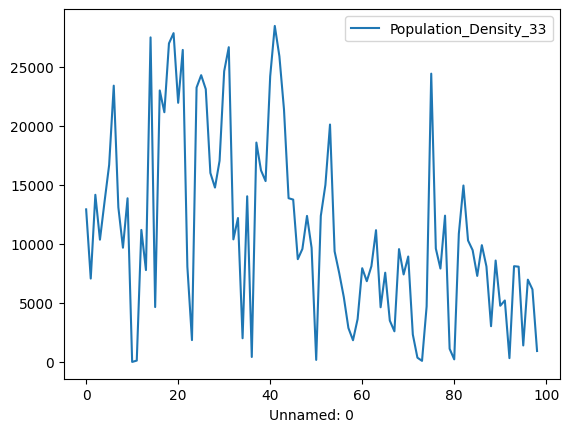

In [234]:
# plot showing population density
df.plot(x="Unnamed: 0", y="Population_Density_33")


<Figure size 640x480 with 0 Axes>

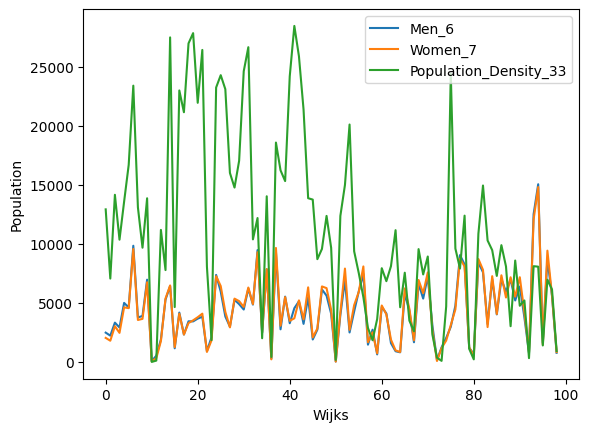

In [235]:
# plot showing men/women data along with population density
plt.figure()
d_new = df[[ "Men_6", "Women_7",  "Population_Density_33"]]
d_new.plot()
plt.xlabel('Wijks')
plt.ylabel('Population')
plt.show()

<Figure size 640x480 with 0 Axes>

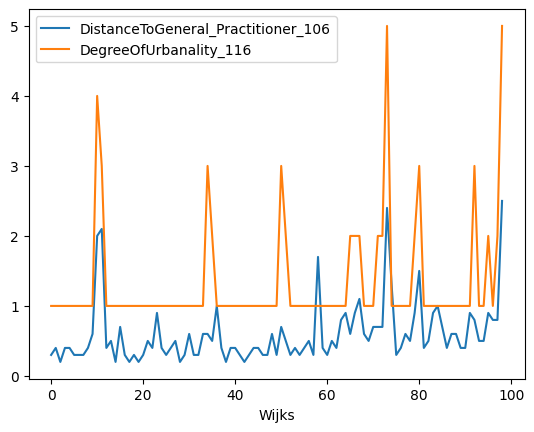

In [211]:
plt.figure()
d_new = df[["DistanceToGeneral_Practitioner_106", "DegreeOfUrbanality_116"]]
d_new.plot( )
plt.xlabel('Wijks')
plt.ylabel('')
plt.show()

<Axes: >

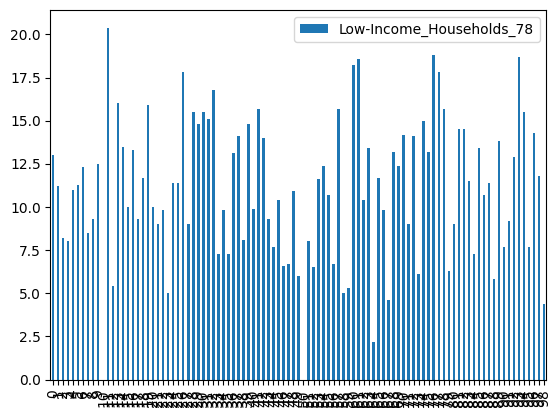

In [212]:
d_new = df[["Low-Income_Households_78"]]
d_new.plot(kind='bar')

In [213]:
import folium

# Create a map centered on a specific location
# map = folium.Map(location=[ 52.3702, 4.8952], zoom_start=10)
map = folium.Map(location=[52.3702, 4.8952], zoom_start=18)

d_new = df.dropna()
# Iterate over each row in the dataframe
for index, row in d_new.iterrows():
    # Extract the latitude, longitude, and number of males and females for each location
    lat = row['LAT']
    lon = row['LNG']
    num_males = row['Men_6']
    num_females = row['Women_7']
    # Create a marker for each location and color it based on the number of males and females
    if num_males > num_females:
        color = 'blue'  # Male-dominated
    else:
        color = 'red'  # Female-dominated
    
    # Add the marker to the map
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=False,
        fill_color=color
    ).add_to(map)

# Display the map
# map


In [214]:
df

,Unnamed: 0,Wijk,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Year_10,k_45To65Year_11,k_65YearsOrOlder_12,Morocco_19,...,AverageIncomePerInhabitant_72,k_40Lowest_Income_Households_76,k_20HouseholdsWithHighestIncome_77,Low-Income_Households_78,DistanceToGeneral_Practitioner_106,AreaTotal_111,DegreeOfUrbanality_116,Oppervlakte_m2,LNG,LAT
0,0,Burgwallen-Oude Zijde,2485,2040,205,780,2140,945,445,35,...,36.3,59.2,12.3,13.0,0.3,40,1.0,403162.0,4.897634,52.372295
1,1,Burgwallen-Nieuwe Zijde,2230,1800,160,625,2110,805,320,35,...,40.7,53.9,14.2,11.2,0.4,73,1.0,725676.0,4.897119,52.374935
2,2,Grachtengordel-West,3330,3030,455,855,2250,1710,1095,15,...,62.3,38.1,30.6,8.2,0.2,57,1.0,566891.0,4.888214,52.373350
3,3,Grachtengordel-Zuid,2920,2465,420,725,2075,1365,795,35,...,77.9,39.0,28.4,8.0,0.4,64,1.0,639377.0,4.892784,52.365052
4,4,Nieuwmarkt/Lastage,5000,4625,740,1130,3220,2680,1855,100,...,42.7,51.4,19.0,11.0,0.4,107,1.0,1062755.0,4.904438,52.372910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,K-buurt,15040,14800,5020,4345,8720,7875,3880,705,...,23.2,59.1,10.0,15.5,0.5,408,1.0,955199.0,4.976349,52.313482
95,95,Nellestein,1605,1460,385,265,980,780,655,25,...,30.1,49.1,8.8,7.7,0.9,295,2.0,2732719.0,4.992844,52.309580
96,96,Holendrecht,8695,9420,3070,2275,4765,4795,3210,460,...,22.1,56.8,8.3,14.3,0.8,271,1.0,1380178.0,4.967061,52.301160
97,97,Gein,5580,5650,1740,1330,3020,3310,1840,205,...,25.4,48.4,12.4,11.8,0.8,192,2.0,1914226.0,4.993925,52.295524


In [215]:
import folium

# Create a map centered on a specific location
# map = folium.Map(location=[ 52.3702, 4.8952], zoom_start=10)
map = folium.Map(location=[52.3702, 4.8952], zoom_start=10)

d_new = df.dropna()
# Iterate over each row in the dataframe
for index, row in d_new.iterrows():
    # Extract the latitude, longitude, and number of males and females for each location
    district = row['Wijk']
    lat = row['LAT']
    lon = row['LNG']
    num_males = row['Men_6']
    num_females = row['Women_7']    
    avg_income = row['AverageIncomePerInhabitant_72']

    folium.CircleMarker(
        location=[lat, lon],
        fill_color=color,
        number_of_sides=4,
        radius=10,
        popup=f"{district}<br>Avg Income: {avg_income}",
        fill_opacity=0.7
    ).add_to(map)
# Display the map
map


In [216]:
d_new.describe()

,Unnamed: 0,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Year_10,k_45To65Year_11,k_65YearsOrOlder_12,Morocco_19,Netherlands_Antilles_And_Aruba_20,...,AverageIncomePerInhabitant_72,k_40Lowest_Income_Households_76,k_20HouseholdsWithHighestIncome_77,Low-Income_Households_78,DistanceToGeneral_Practitioner_106,AreaTotal_111,DegreeOfUrbanality_116,Oppervlakte_m2,LNG,LAT
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.00000,80.000000,...,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,8.000000e+01,80.000000,80.000000
mean,47.000000,4954.687500,5036.375000,1394.437500,1236.812500,3687.875000,2379.18750,1292.687500,851.43750,144.875000,...,36.69875,49.341250,18.971250,11.558750,0.481250,126.837500,1.125000,1.245648e+06,4.893475,52.363252
std,28.302614,2489.554678,2541.311205,923.346964,791.958494,1717.504035,1358.89718,788.736349,1015.71612,231.990527,...,13.12207,9.254649,8.994277,3.579113,0.257099,97.758867,0.368885,9.896164e+05,0.047993,0.024630
min,0.000000,1465.000000,1460.000000,160.000000,185.000000,790.000000,540.00000,150.000000,15.00000,25.000000,...,20.40000,23.200000,6.100000,4.600000,0.200000,26.000000,1.000000,2.575420e+05,4.784397,52.295524
25%,24.750000,3188.750000,3060.000000,738.750000,755.000000,2431.250000,1356.25000,745.000000,172.50000,60.000000,...,25.77500,44.675000,12.375000,9.000000,0.300000,53.750000,1.000000,5.388962e+05,4.860552,52.349703
50%,45.500000,4585.000000,4590.000000,1192.500000,1052.500000,3377.500000,2182.50000,1190.000000,497.50000,97.500000,...,35.15000,51.050000,16.800000,11.400000,0.400000,101.500000,1.000000,9.604180e+05,4.891559,52.362655
75%,69.250000,6158.750000,6402.500000,1747.500000,1572.500000,4665.000000,2921.25000,1733.750000,1078.75000,137.500000,...,42.15000,54.900000,23.100000,14.350000,0.600000,154.250000,1.000000,1.512428e+06,4.921505,52.376372
max,97.000000,15040.000000,14800.000000,5020.000000,4740.000000,8720.000000,7875.00000,3880.000000,4480.00000,1525.000000,...,79.10000,68.200000,48.600000,18.800000,1.700000,408.000000,3.000000,4.787204e+06,5.006388,52.422292


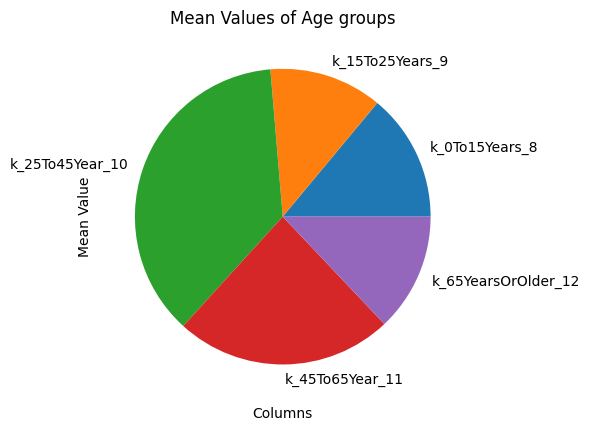

In [217]:
data1 = d_new[['k_0To15Years_8', 'k_15To25Years_9', 'k_25To45Year_10', 'k_45To65Year_11', 'k_65YearsOrOlder_12']]
mean_values = data1.mean()

# Plot the mean values in a bar graph
mean_values.plot.pie()

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.title('Mean Values of Age groups')

# Display the plot
plt.show()

In [218]:
df = data[['AverageIncomePerInhabitant_72','k_40Lowest_Income_Households_76', 'Low-Income_Households_78', 'k_0To15Years_8', 'k_15To25Years_9', 'k_25To45Year_10', 'k_45To65Year_11', 'k_65YearsOrOlder_12', 'Number_of_Inhabitants_5','Education_levelLow_64', 'WesternTotal_17', 'NonWesternTotal_18', 'HouseholdsWithChildren_31', 'HouseholdTotal_28']]
df['ratio_children'] = df.k_0To15Years_8 / df.Number_of_Inhabitants_5
df['ratio_young'] = (df.k_15To25Years_9 + df.k_25To45Year_10) / df.Number_of_Inhabitants_5
df['ratio_old'] = (df.k_45To65Year_11 + df.k_65YearsOrOlder_12) / df.Number_of_Inhabitants_5
df['ratio_western_immigration'] = df.WesternTotal_17 / df.Number_of_Inhabitants_5
df['ratio_nonwester_immigration'] = df.NonWesternTotal_18 /  df.Number_of_Inhabitants_5
df['ratio_immigration'] = (df.WesternTotal_17 + df.NonWesternTotal_18) /  df.Number_of_Inhabitants_5

df['ratio_household_with_children'] = df.HouseholdsWithChildren_31 / df.HouseholdTotal_28
# df['AverageIncomePerInhabitant_72']
df['ratio_low_ed'] = df.Education_levelLow_64 / df.Number_of_Inhabitants_5

<ipython-input-218-41e2982b15eb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-218-41e2982b15eb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-218-41e2982b15eb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-218-41e

In [236]:
# df

In [237]:
# df.head()

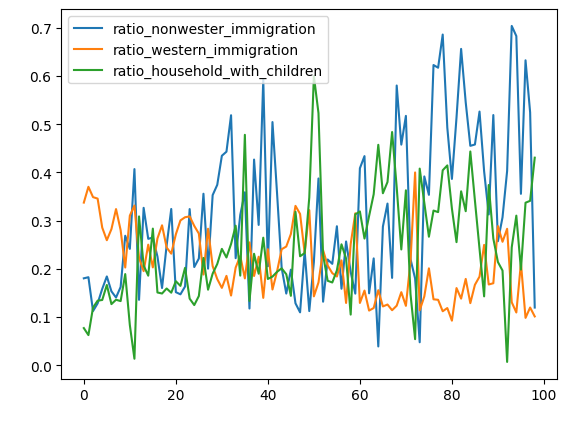

In [221]:
df_1 = df[['ratio_nonwester_immigration', 'ratio_western_immigration', 'ratio_household_with_children']] 
df_1.plot()

# Add labels and title
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('')

# Display the plot
plt.show()

<Axes: ylabel='Density'>

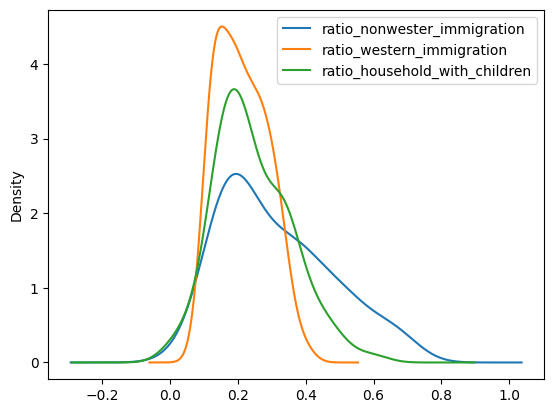

In [222]:
df_1.plot(kind='kde')

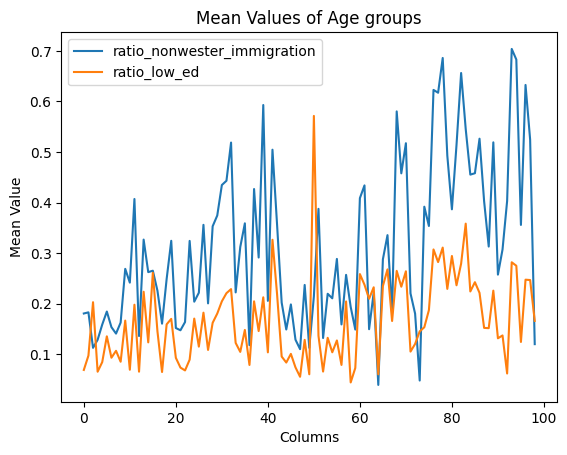

In [223]:
df_1 = df[['ratio_nonwester_immigration', 'ratio_low_ed']] 
df_1.plot()

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.title('Mean Values of Age groups')

# Display the plot
plt.show()

In [224]:
# df['AverageIncomePerInhabitant_72f']

<Axes: ylabel='Density'>

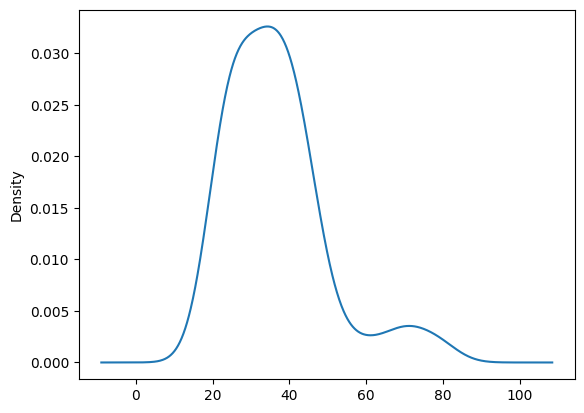

In [225]:
df['AverageIncomePerInhabitant_72'].plot(kind='kde')

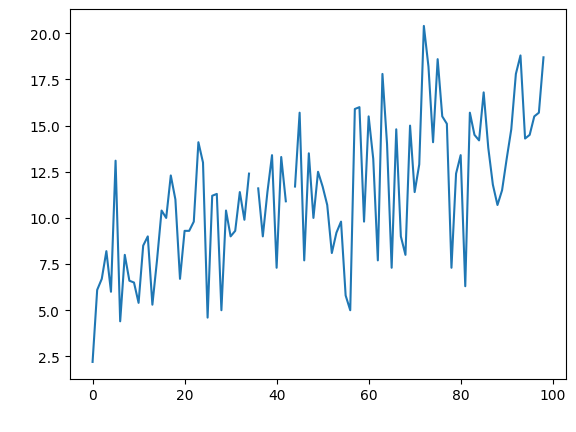

In [226]:
dff = df[['Low-Income_Households_78', 'ratio_nonwester_immigration']].sort_values(by='ratio_nonwester_immigration')

plt.plot(range(dff.shape[0]), dff['Low-Income_Households_78'])

# Add labels and title
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('')

# Display the plot
plt.show()

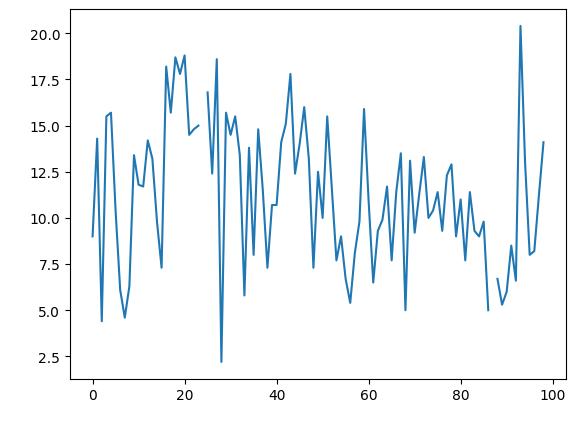

In [227]:
dff = df[['Low-Income_Households_78', 'ratio_western_immigration']].sort_values(by='ratio_western_immigration')

plt.plot(range(dff.shape[0]), dff['Low-Income_Households_78'])

# Add labels and title
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('')

# Display the plot
plt.show()

In [228]:
dff.corr()

,Low-Income_Households_78,ratio_western_immigration
Low-Income_Households_78,1.000000,-0.255479
ratio_western_immigration,-0.255479,1.000000


[Text(0.5, 23.38159722222222, ''), Text(50.5815972222222, 0.5, '')]

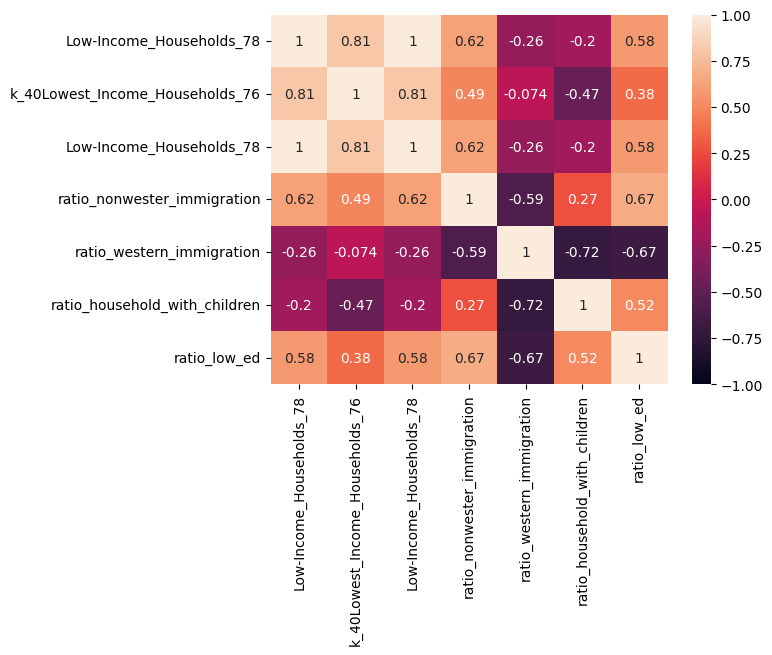

In [229]:
dff = df[['Low-Income_Households_78', 'k_40Lowest_Income_Households_76', 'Low-Income_Households_78','ratio_nonwester_immigration', 'ratio_western_immigration', 'ratio_household_with_children', 'ratio_low_ed']] 
ax = sns.heatmap(dff.corr(), annot=True, vmin=-1, vmax=1 )
ax.set(xlabel="", ylabel="")
# ax.xaxis.tick_top()


In [230]:
data_final = pd.read_csv('/content/gdrive/MyDrive/hack4her_ctrlfreaks/data.csv', delimiter=';')

In [231]:
df_final = data_final.sort_values(ascending=False, by = 'metric')
df_f = df_final.head()

In [232]:
import folium

# Create a map centered on a specific location
# map = folium.Map(location=[ 52.3702, 4.8952], zoom_start=10)
map = folium.Map(location=[52.3702, 4.8952], zoom_start=10)

# d_new = df.dropna()
# Iterate over each row in the dataframe
for index, row in df_f.iterrows():
    # Extract the latitude, longitude, and number of males and females for each location
    district = row['Wijk']
    lat = row['LAT']
    lon = row['LNG']   
    high_metric = row['metric']
    # Create a marker for each location and color it based on the number of males and females
    # if num_males > num_females:
    #     color = 'blue'  # Male-dominated
    # else:
    #     color = 'red'  # Female-dominated
    
    # Add the marker to the map
    # folium.CircleMarker(
    #     location=[lat, lon],
    #     radius=5,
    #     color=color,
    #     fill=False,
    #     fill_color=color
    # ).add_to(map)
    folium.CircleMarker(
        location=[lat, lon],
        fill_color=color,
        number_of_sides=4,
        radius=10,
        popup=f"{district}<br> high_metric: {high_metric}",
        fill_opacity=0.7
    ).add_to(map)
# Display the map
map